In [ ]:
import numpy as np
import pandas as pd


In [ ]:
from datetime import datetime
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

from matplotlib import rcParams
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

In [ ]:
# import the data:
df = pd.read_csv("/home/hala/cri homework/clustering/data.csv", delimiter=',', encoding = "ISO-8859-1")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
#describe the  numeric fearture
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df.drop(['Description'],axis=1,inplace =True)

In [ ]:
df.dropna(inplace =True)

In [ ]:
# drop the negative value out 
df.drop(df[df['Quantity'] < 0].index, inplace = True)
df.drop(df[df['UnitPrice'] < 0].index, inplace = True)


In [ ]:
#check whether are there any negative value:
df[df['Quantity']<0].shape[0], df[df['UnitPrice']<0].shape[0] 



(0, 0)

In [ ]:
df2=df.copy()

In [ ]:
#Check the data information:
df2.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Quantity     397924 non-null  int64  
 3   InvoiceDate  397924 non-null  object 
 4   UnitPrice    397924 non-null  float64
 5   CustomerID   397924 non-null  float64
 6   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 24.3+ MB


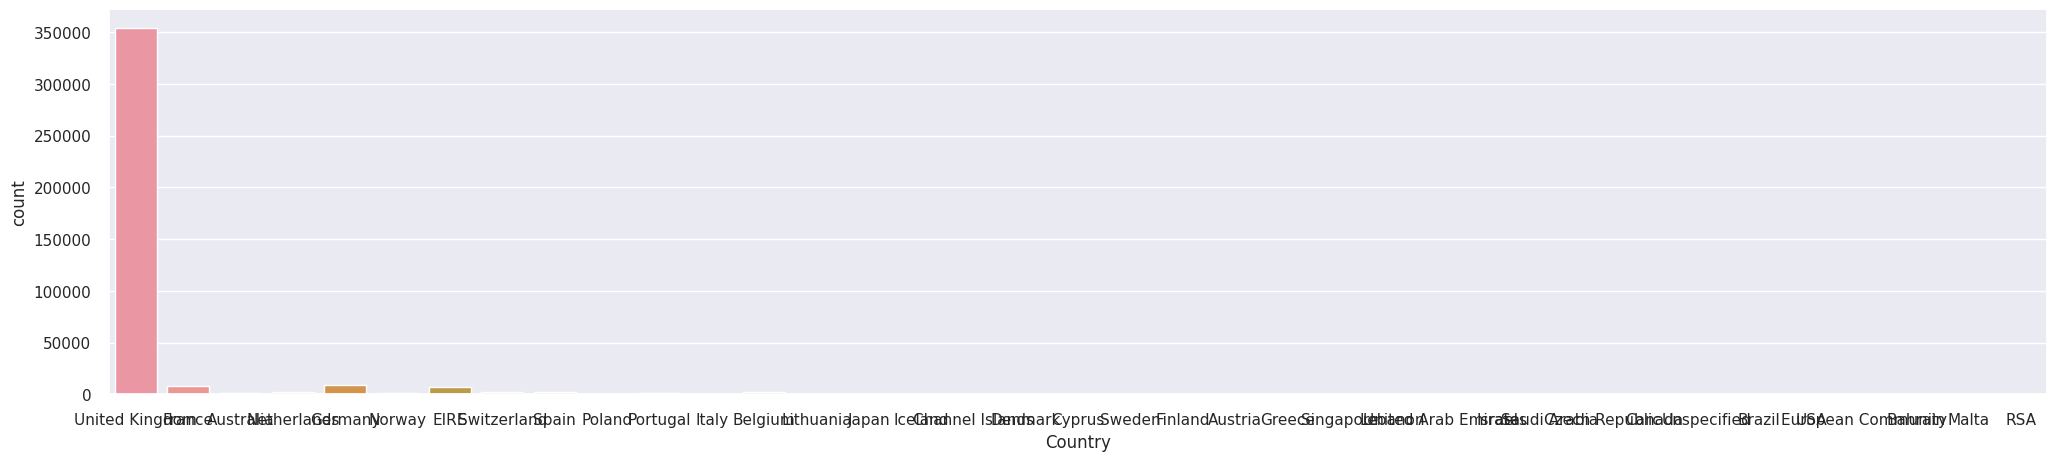

In [ ]:
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="Country", data=df)


In [ ]:
dfuk=df2[df2['Country']=='United Kingdom']

In [ ]:
dfuk

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541889,581585,22466,12,12/9/2011 12:31,1.95,15804.0,United Kingdom
541890,581586,22061,8,12/9/2011 12:49,2.95,13113.0,United Kingdom
541891,581586,23275,24,12/9/2011 12:49,1.25,13113.0,United Kingdom
541892,581586,21217,24,12/9/2011 12:49,8.95,13113.0,United Kingdom


In [ ]:
# We are going to 

# Total amount a customer spent: Amount = Quantity * UnitPrice
# Number of transaction: Number of InvoiceNo by Customer
# Last transaction: the days since last transaction

In [ ]:

# Total Amount:
dfuk['TotalAmount']= dfuk['Quantity']*df['UnitPrice']
tm=dfuk.groupby('CustomerID')['TotalAmount'].sum().reset_index()
tm



,CustomerID,TotalAmount
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33719.73
3,12749.0,4090.88
4,12820.0,942.34
...,...,...
3916,18280.0,180.60
3917,18281.0,80.82
3918,18282.0,178.05
3919,18283.0,2094.88


In [ ]:
#number_transaction:
nt=dfuk.groupby('CustomerID')['InvoiceNo'].count().reset_index()
nt



,CustomerID,InvoiceNo
0,12346.0,1
1,12747.0,103
2,12748.0,4596
3,12749.0,199
4,12820.0,59
...,...,...
3916,18280.0,10
3917,18281.0,7
3918,18282.0,12
3919,18283.0,756


In [ ]:
#alculating Recency (Last Transaction):¶

#Last transaction: 
dfuk['InvoiceDate'] = pd.to_datetime(dfuk['InvoiceDate'])
dfuk['Last_transaction']=(dfuk['InvoiceDate'].max()-dfuk['InvoiceDate']).dt.days
lt = dfuk.groupby(['CustomerID','Country'])['Last_transaction'].max().reset_index()
lt



,CustomerID,Country,Last_transaction
0,12346.0,United Kingdom,325
1,12747.0,United Kingdom,368
2,12748.0,United Kingdom,373
3,12749.0,United Kingdom,212
4,12820.0,United Kingdom,326
...,...,...,...
3916,18280.0,United Kingdom,277
3917,18281.0,United Kingdom,180
3918,18282.0,United Kingdom,125
3919,18283.0,United Kingdom,336


In [ ]:


merge1= pd.merge(lt, nt, how='inner', on='CustomerID')
new_df=pd.merge(merge1,tm,how='inner',on= 'CustomerID')
new_df



,CustomerID,Country,Last_transaction,InvoiceNo,TotalAmount
0,12346.0,United Kingdom,325,1,77183.60
1,12747.0,United Kingdom,368,103,4196.01
2,12748.0,United Kingdom,373,4596,33719.73
3,12749.0,United Kingdom,212,199,4090.88
4,12820.0,United Kingdom,326,59,942.34
...,...,...,...,...,...
3916,18280.0,United Kingdom,277,10,180.60
3917,18281.0,United Kingdom,180,7,80.82
3918,18282.0,United Kingdom,125,12,178.05
3919,18283.0,United Kingdom,336,756,2094.88


/home/hala/cri/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


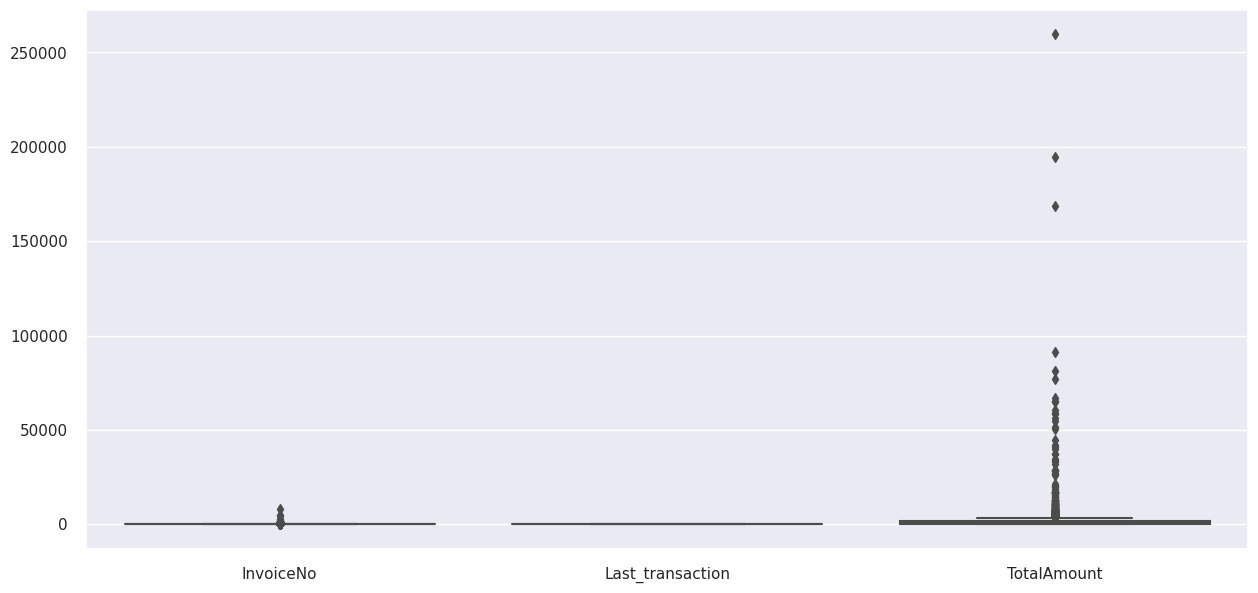

In [ ]:


plt.figure(figsize=(15,7))
sns.boxplot(data = new_df[['InvoiceNo','Last_transaction','TotalAmount']])
plt.show()



In [ ]:
IQR= new_df['TotalAmount'].quantile(0.75)-new_df['TotalAmount'].quantile(0.25)
lower_limit= new_df['TotalAmount'].quantile(0.25) - 1.5*IQR
upper_limit=new_df['TotalAmount'].quantile(0.75) + 1.5*IQR
k=new_df[new_df['TotalAmount']>upper_limit]
m=new_df[new_df['TotalAmount']<lower_limit]
df_iqr=new_df[(new_df['TotalAmount']<upper_limit) & (new_df['TotalAmount']>lower_limit)]
print('Data shape before removing outlier',new_df.shape)
print('Data shape after removing outlier',df_iqr.shape)
print('Total number of outlier:',len(k)+len(m))


Data shape before removing outlier (3921, 5)
Data shape after removing outlier (3539, 5)
Total number of outlier: 382


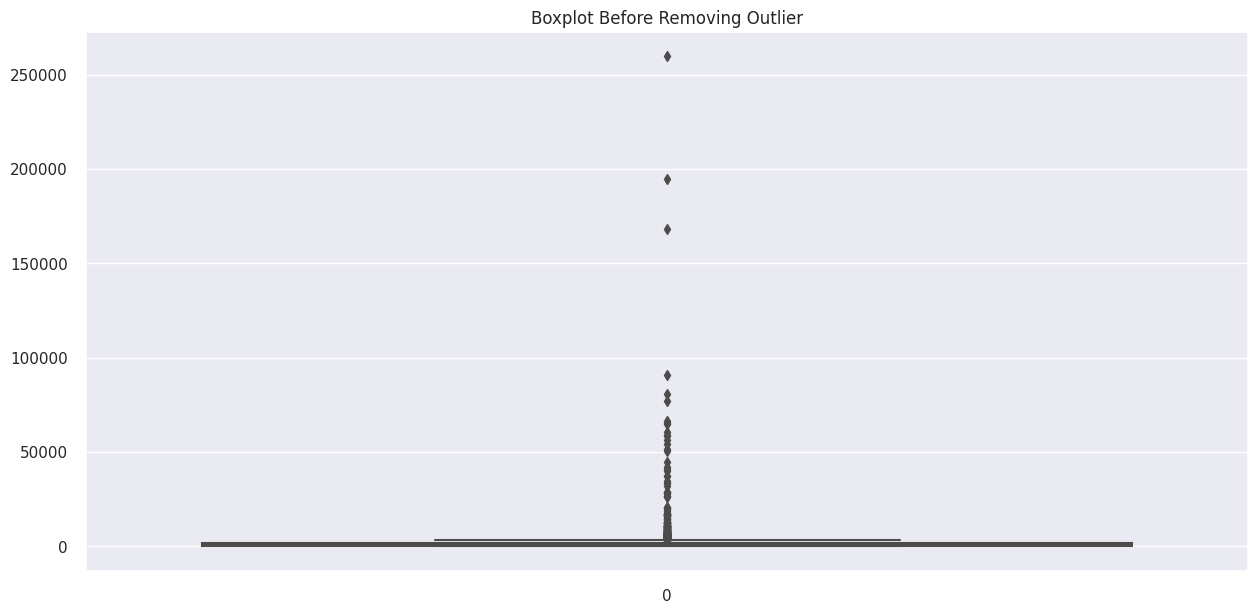

KeyError: 0

<Figure size 1500x700 with 0 Axes>

In [ ]:
#### plot the boxplot before and after remove the outlier
plt.figure(figsize=(15,7))
sns.boxplot(new_df['TotalAmount'])
plt.title('Boxplot Before Removing Outlier')
plt.show()

plt.figure(figsize=(15,7))
sns.boxplot(df_iqr['TotalAmount'])
plt.title('Boxplot After Removing Outlier')
plt.show()

In [ ]:
### The new data frame after removing outlier
df_iqr.reset_index(drop=True, inplace= True)
df_iqr


,CustomerID,Country,Last_transaction,InvoiceNo,TotalAmount
0,12820.0,United Kingdom,326,59,942.34
1,12821.0,United Kingdom,213,6,92.72
2,12822.0,United Kingdom,86,46,948.88
3,12823.0,United Kingdom,296,5,1759.50
4,12824.0,United Kingdom,59,25,397.12
...,...,...,...,...,...
3534,18280.0,United Kingdom,277,10,180.60
3535,18281.0,United Kingdom,180,7,80.82
3536,18282.0,United Kingdom,125,12,178.05
3537,18283.0,United Kingdom,336,756,2094.88


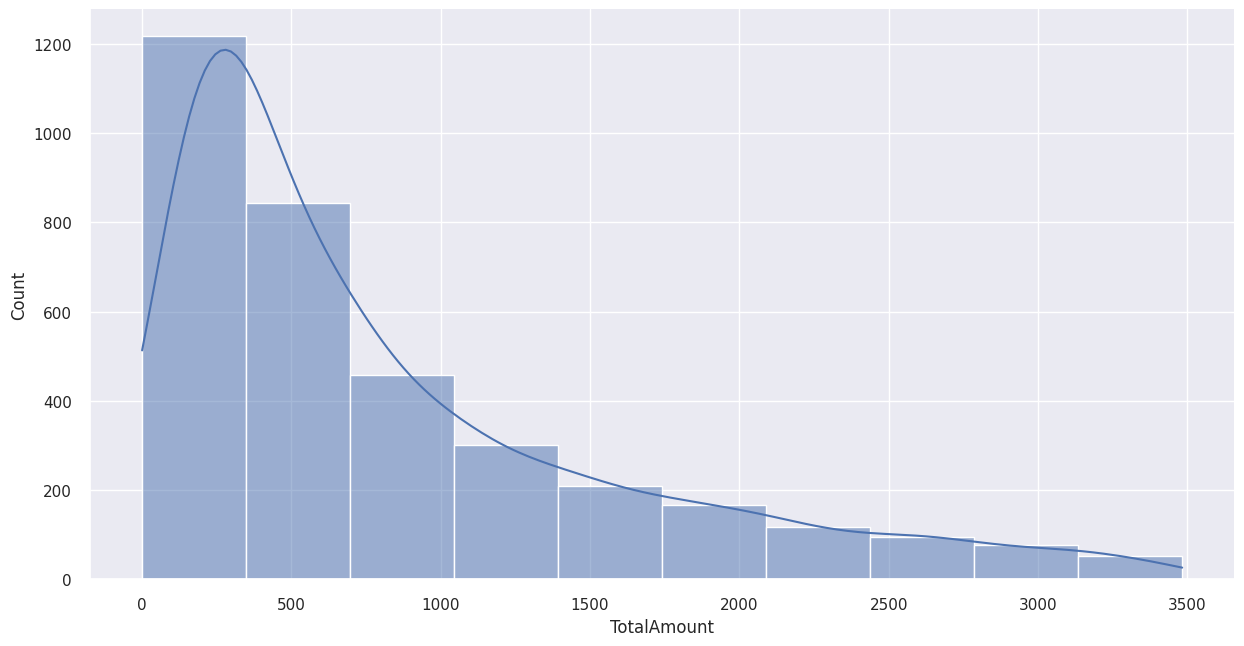

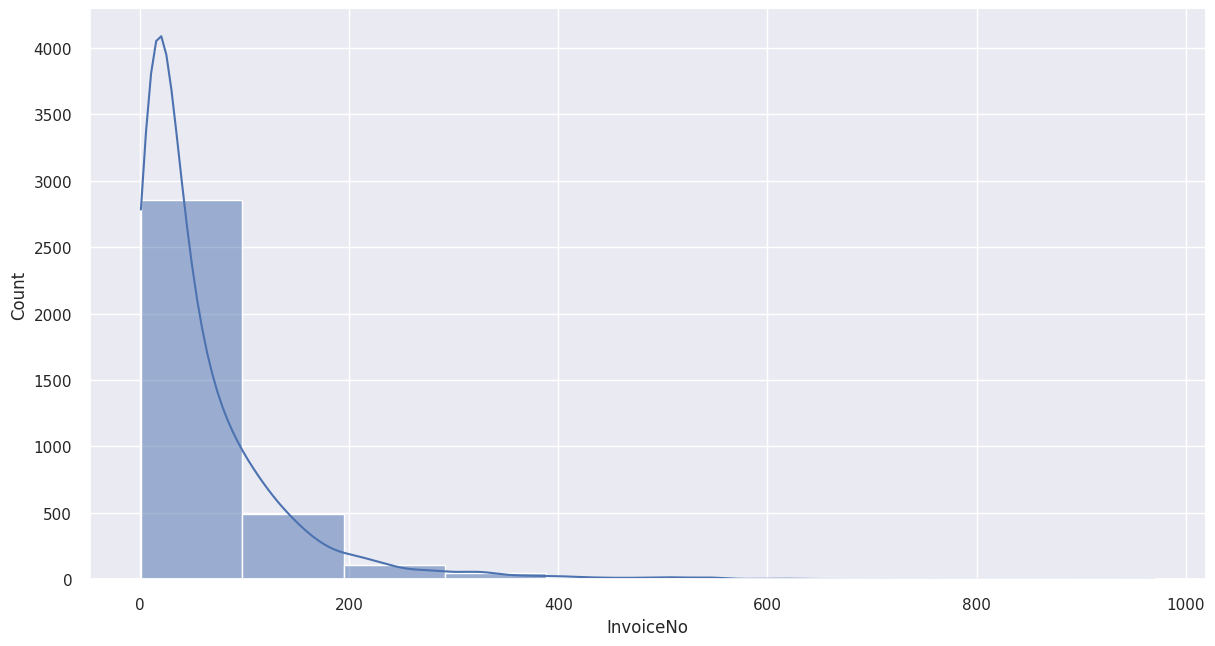

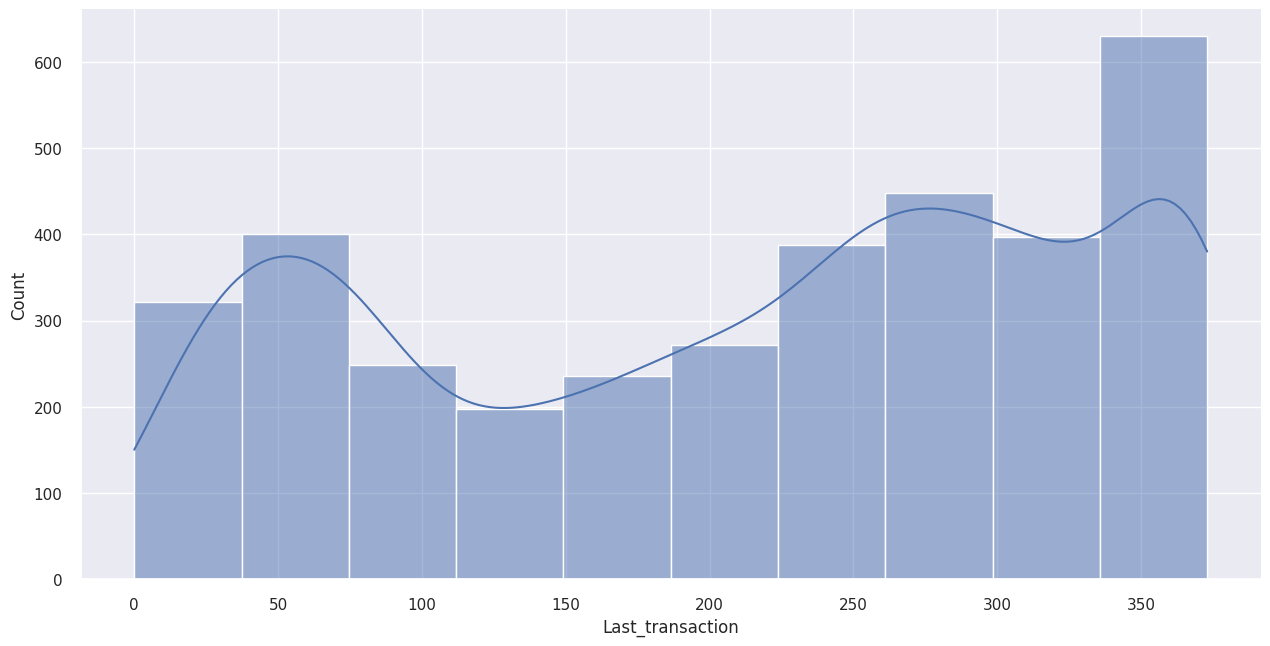

In [ ]:
#Histogram Plot: 
new1_df=df_iqr.copy()
df_num=['TotalAmount','InvoiceNo','Last_transaction']
for i in df_num:
    sns.displot(new1_df[i],bins=10,kde=True)
    plt.gcf().set_size_inches(15, 7)
    plt.show()


/tmp/ipykernel_42920/3624780602.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new1_df.corr(),cmap="Greens", annot=True)


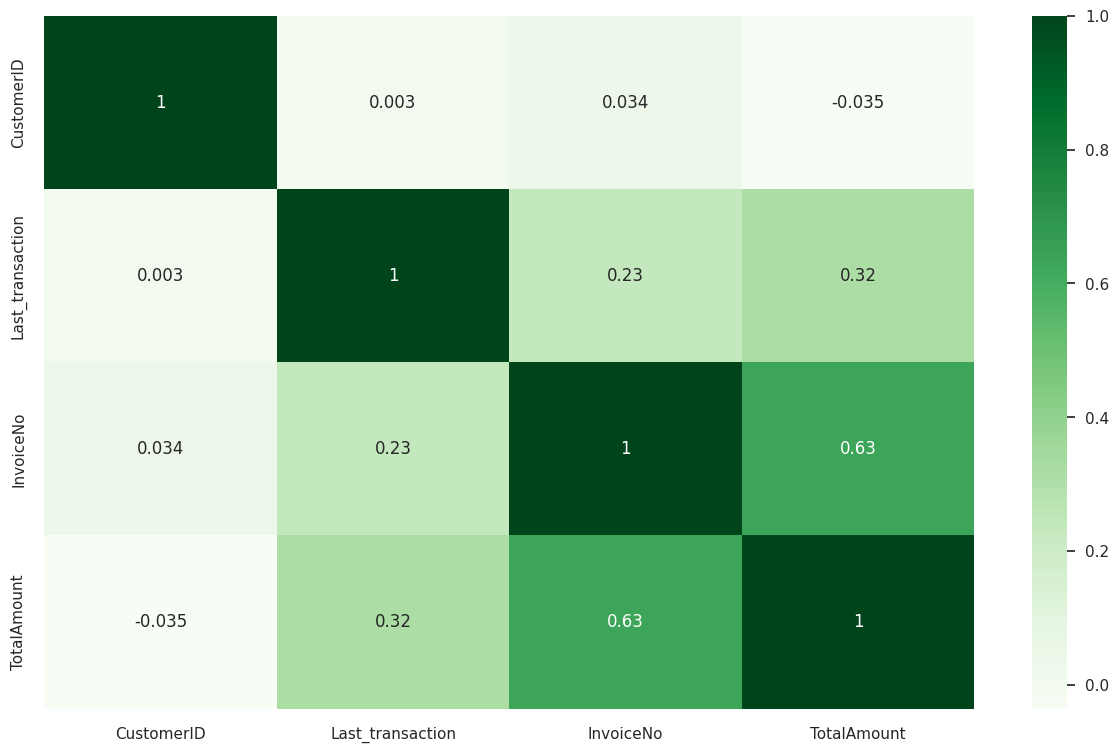

In [ ]:


plt.figure(figsize=(15,9))
sns.heatmap(new1_df.corr(),cmap="Greens", annot=True)
plt.show()



In [ ]:
new1_df.drop(['Country'],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled=scaler.fit(new1_df)
x_scaled = scaler.fit_transform(new1_df)
x_scaled


array([[-1.7536511 ,  0.97719131, -0.03009139,  0.12630716],
       [-1.75301465,  0.01126532, -0.71522753, -0.96173755],
       [-1.75237821, -1.07433293, -0.19814365,  0.13468245],
       ...,
       [ 1.72261435, -0.74096024, -0.63766495, -0.85246181],
       [ 1.7232508 ,  1.06267149,  8.98009528,  1.60227884],
       [ 1.72579658, -0.0913109 ,  0.11210668,  1.27238981]])

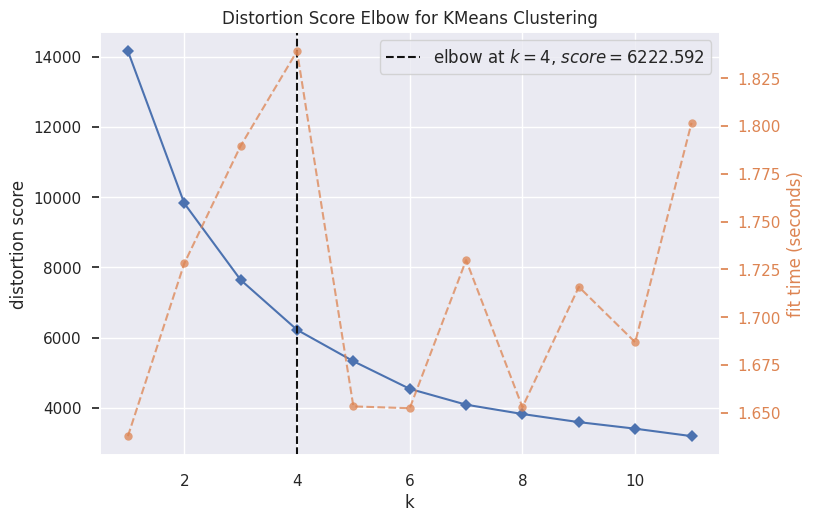

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(init='k-means++')
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(x_scaled)  
visualizer.show()     


,CustomerID,Last_transaction,InvoiceNo,TotalAmount
cluster_pred,,,,
0,966,966,966,966
1,952,952,952,952
2,1075,1075,1075,1075
3,546,546,546,546


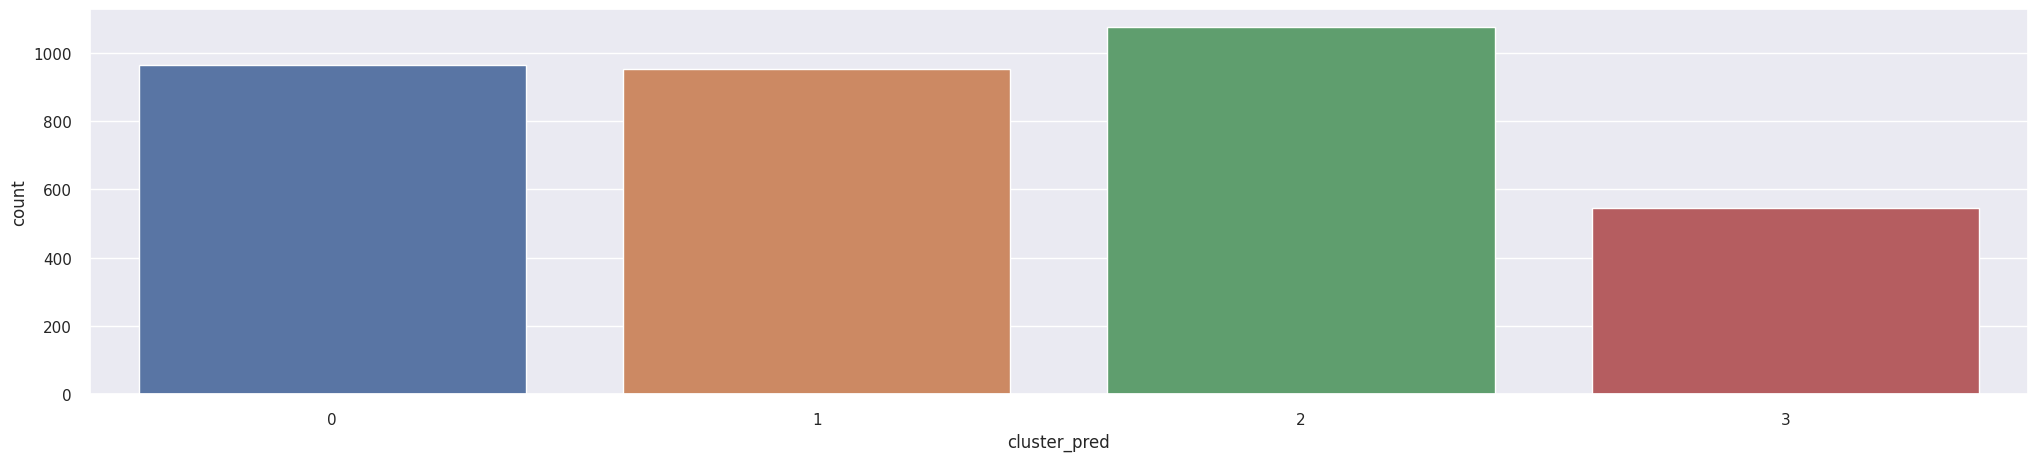

In [ ]:


kmeans_scaled = KMeans(4,init='k-means++')
kmeans_scaled.fit(x_scaled)
clusters_scaled = new1_df.copy()
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)
#print(identified_clusters)
sns.set(style="darkgrid")
#print(kmeans.cluster_centers_)
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="cluster_pred", data=clusters_scaled)
clusters_scaled.groupby(['cluster_pred']).count()



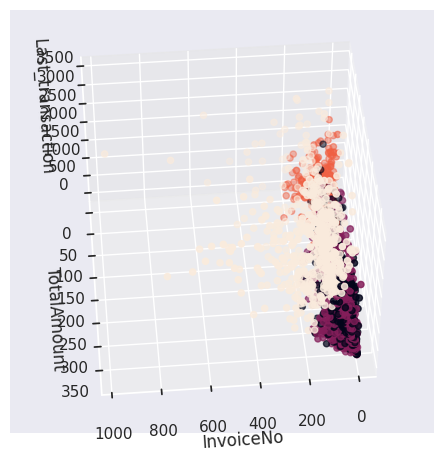

In [ ]:


fig = plt.figure()
ax = plt.axes(projection='3d')
yline=clusters_scaled['TotalAmount']
xline=clusters_scaled['InvoiceNo']
zline=clusters_scaled['Last_transaction']
ax.set_xlabel('InvoiceNo')
ax.set_ylabel('TotalAmount')
ax.set_zlabel('Last_transaction')


ax.scatter3D(xline, zline,yline,c=clusters_scaled['cluster_pred'])
ax.view_init(45, 85)



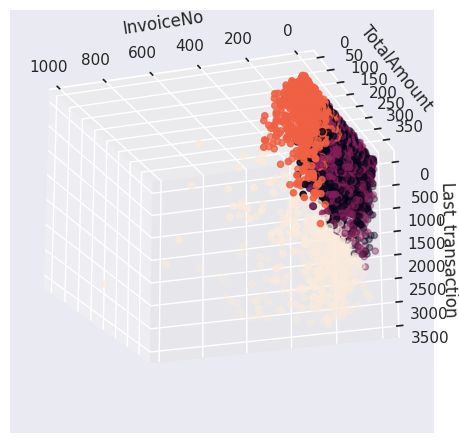

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
yline=clusters_scaled['TotalAmount']
xline=clusters_scaled['InvoiceNo']
zline=clusters_scaled['Last_transaction']
ax.set_xlabel('InvoiceNo')
ax.set_ylabel('TotalAmount')
ax.set_zlabel('Last_transaction')


ax.scatter3D(xline, zline,yline,c=clusters_scaled['cluster_pred'])
ax.view_init(160, 70)



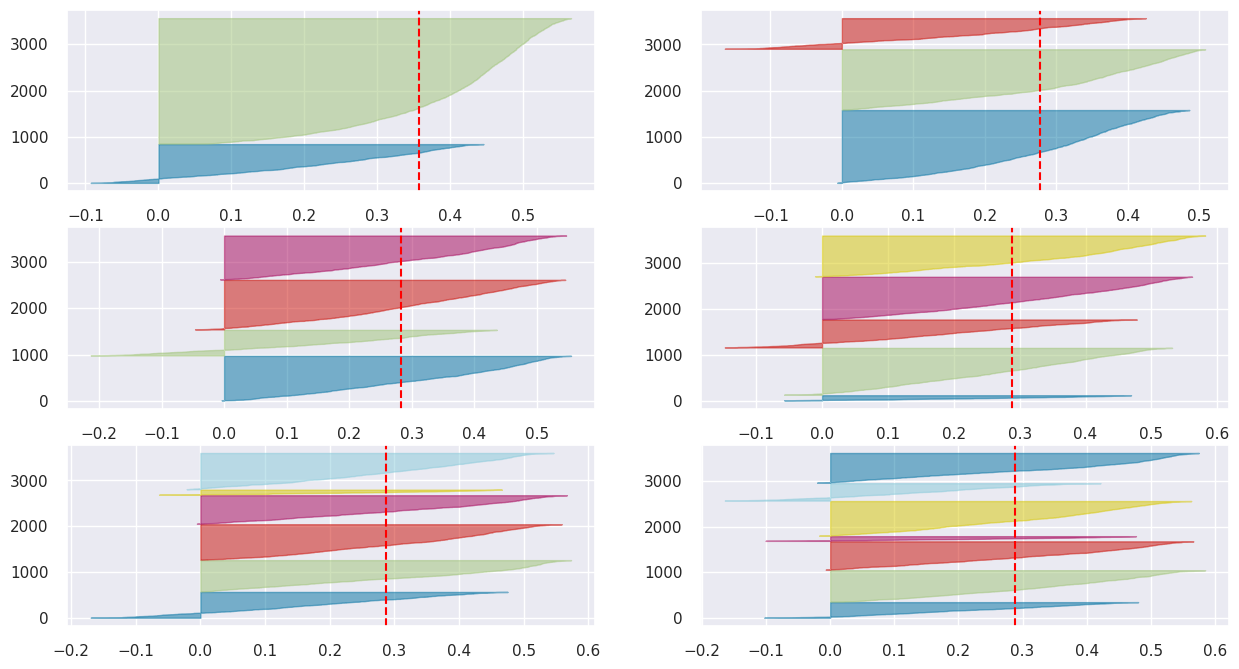

In [ ]:

fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x_scaled) 

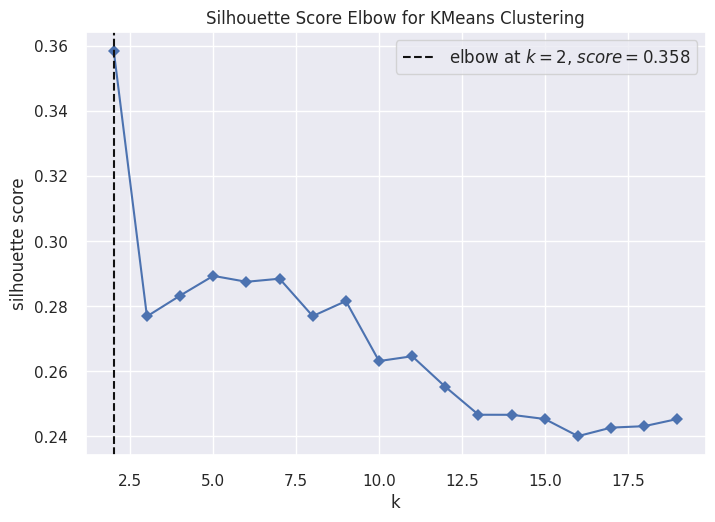

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,20),metric='silhouette', timings= False)
visualizer.fit(x_scaled)        # Fit the data to the visualizer
visualizer.show() 

,CustomerID,Last_transaction,InvoiceNo,TotalAmount
cluster_pred,,,,
0,2710,2710,2710,2710
1,829,829,829,829


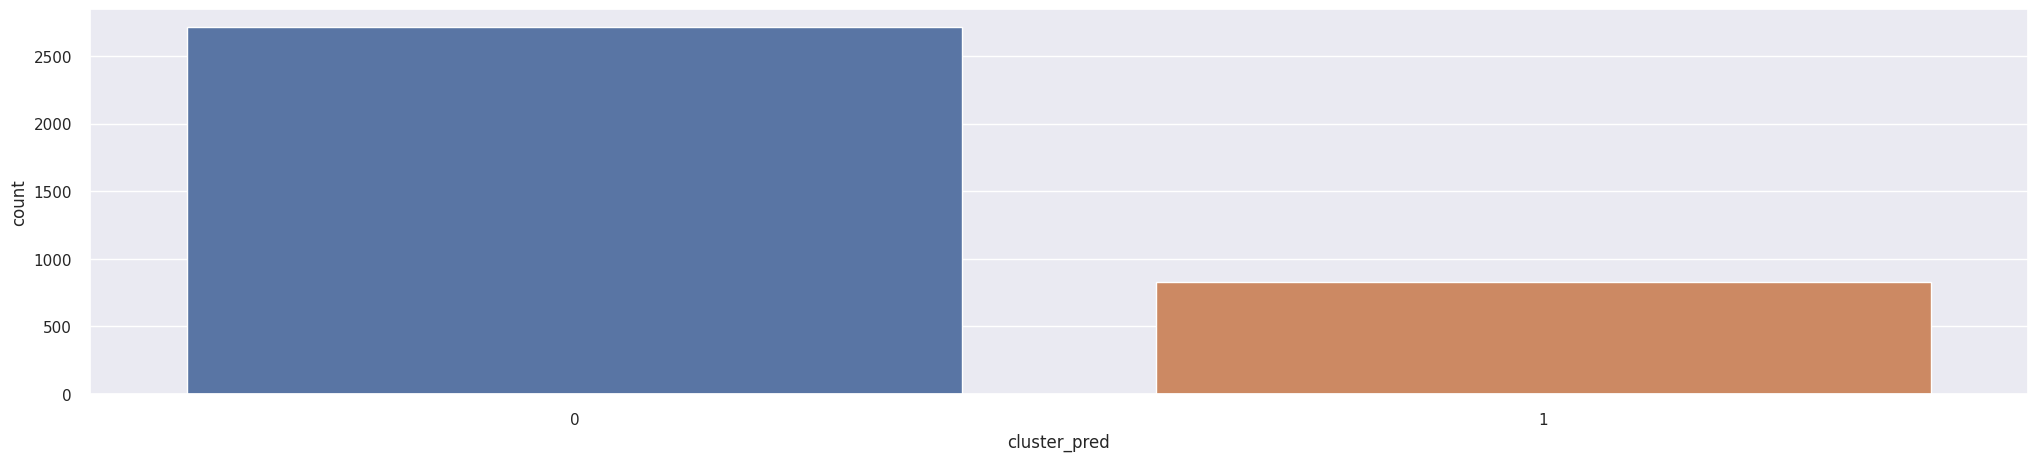

In [ ]:


# Add the number of cluster columns in the data frame
km = KMeans(n_clusters=2)

#kmeans_scaled = KMeans(4)
km.fit(x_scaled)
clusters_scaled2 = new1_df.copy()
clusters_scaled2['cluster_pred']=km.fit_predict(x_scaled)
#print(identified_clusters)
sns.set(style="darkgrid")
#print(kmeans.cluster_centers_)
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="cluster_pred", data=clusters_scaled2)
clusters_scaled2.groupby(['cluster_pred']).count()



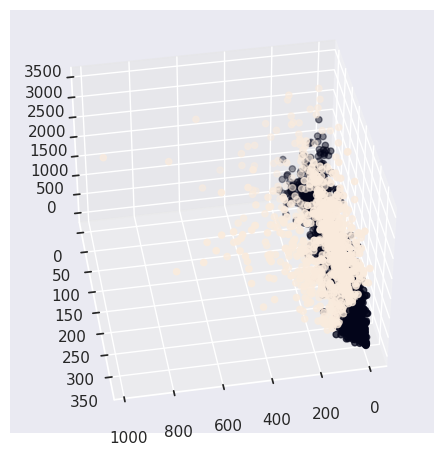

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
yline=clusters_scaled['TotalAmount']
xline=clusters_scaled['InvoiceNo']
zline=clusters_scaled['Last_transaction']

ax.scatter3D(xline, zline,yline,c=clusters_scaled2['cluster_pred'])
ax.view_init(40, 80)



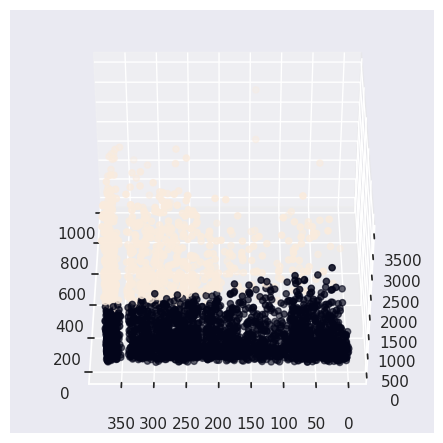

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
yline=clusters_scaled['TotalAmount']
xline=clusters_scaled['InvoiceNo']
zline=clusters_scaled['Last_transaction']

ax.scatter3D(xline, zline,yline,c=clusters_scaled2['cluster_pred'])
ax.view_init(40, 180)


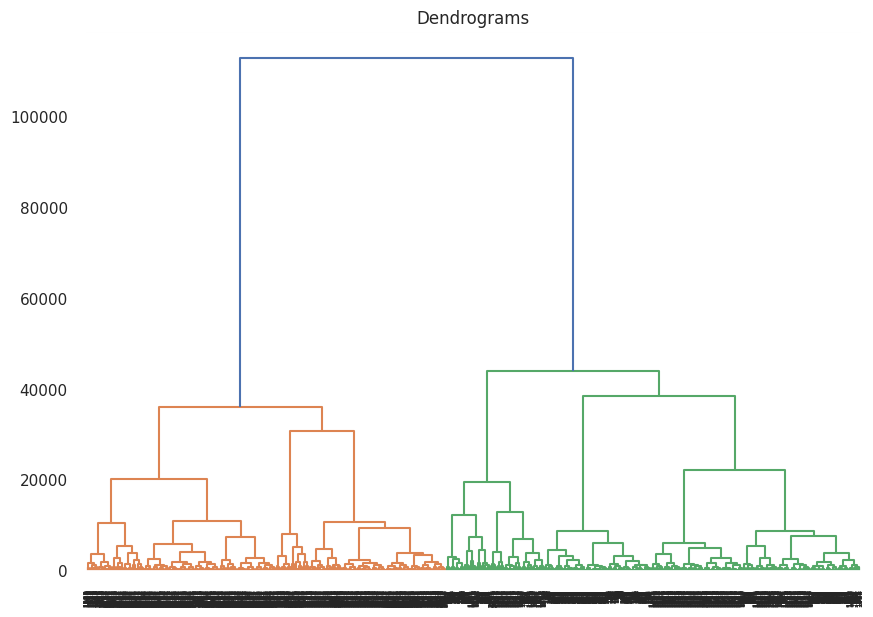

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(new1_df, method='ward'))

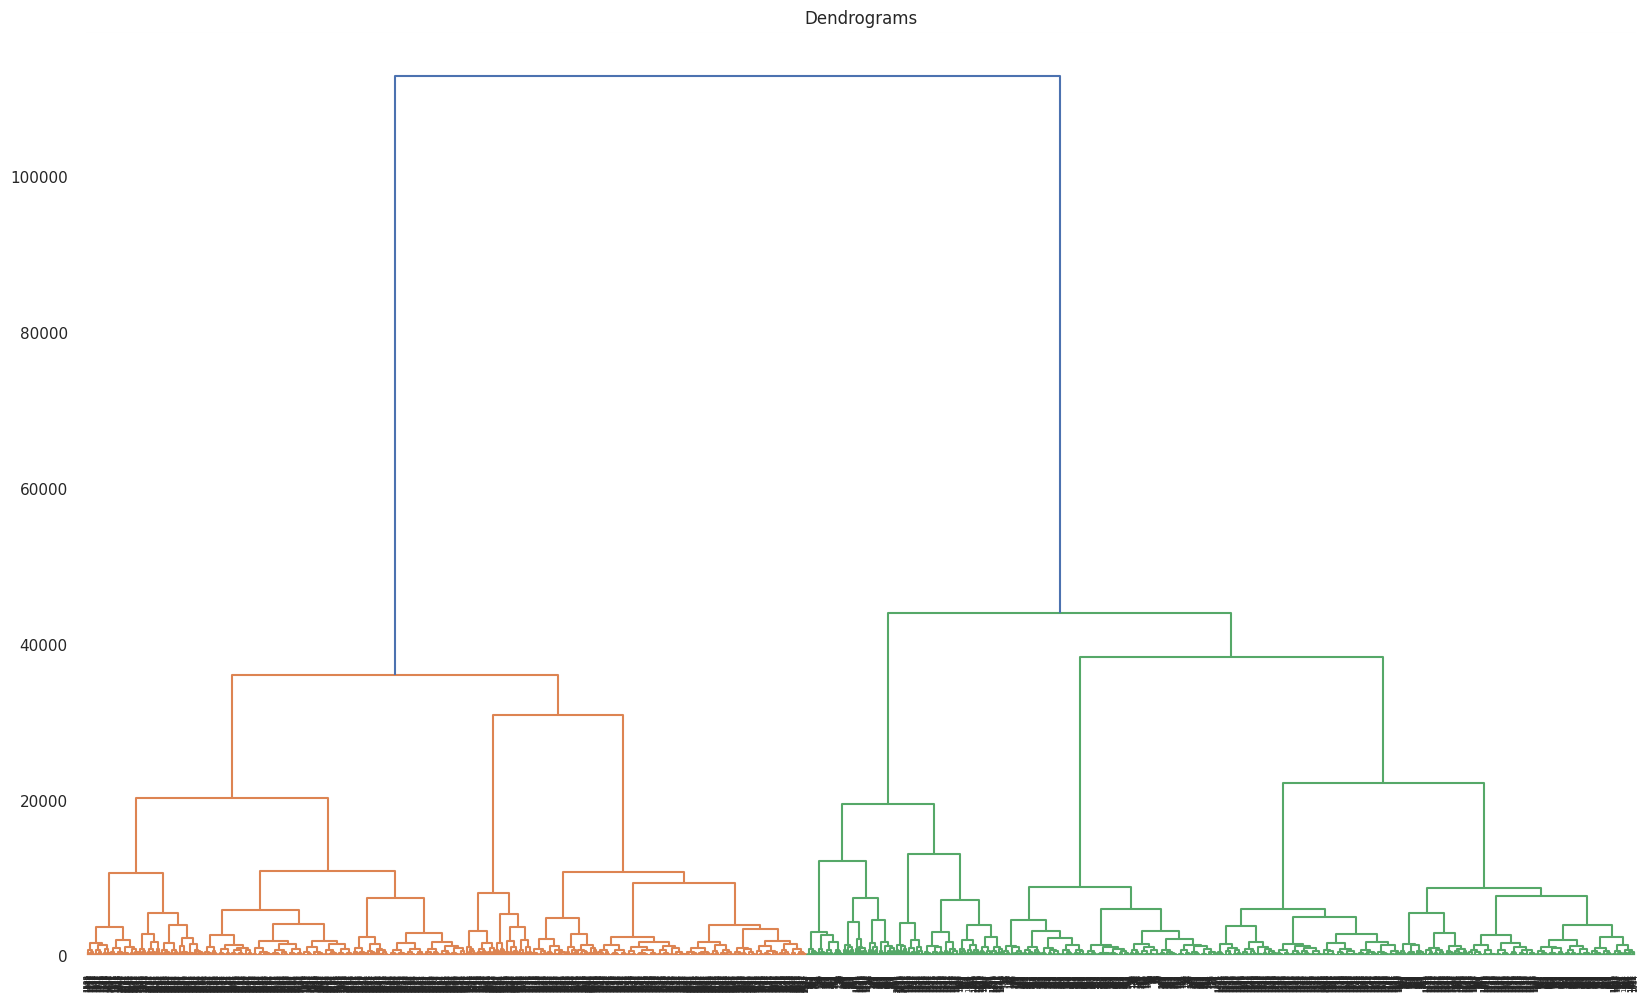

In [ ]:
plt.figure(figsize=(20, 12))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(new1_df, method='ward'))
plt.axhline(y=50, c='grey', lw=1, linestyle='dashed')
plt.show()



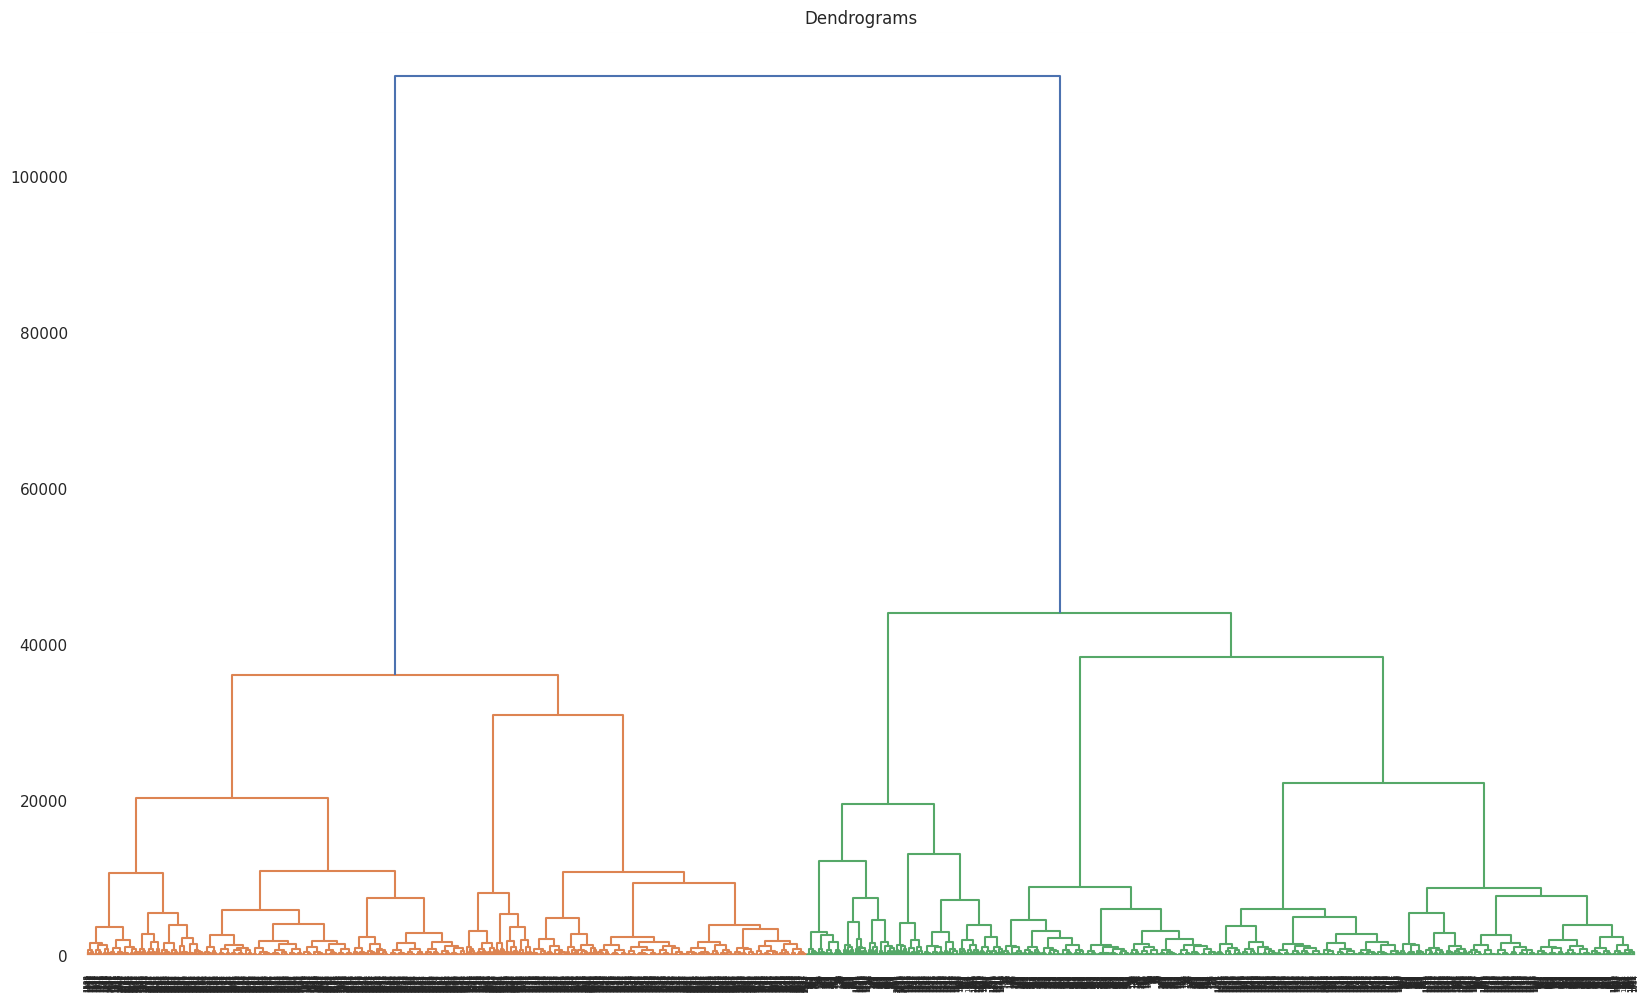

In [ ]:


plt.figure(figsize=(20, 12))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(new1_df, method='ward'))
plt.axhline(y=30, c='grey', lw=1, linestyle='dashed')
plt.show()



In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster_new = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
two_clusters=cluster_new.fit_predict(new1_df)

cluster_new = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
three_clusters=cluster_new.fit_predict(new1_df)

new1_df['two_clusters'] = two_clusters
new1_df['three_clusters']= three_clusters
new1_df



,CustomerID,Last_transaction,InvoiceNo,TotalAmount,two_clusters,three_clusters
0,12820.0,326,59,942.34,0,0
1,12821.0,213,6,92.72,0,0
2,12822.0,86,46,948.88,0,0
3,12823.0,296,5,1759.50,0,2
4,12824.0,59,25,397.12,0,0
...,...,...,...,...,...,...
3534,18280.0,277,10,180.60,1,1
3535,18281.0,180,7,80.82,1,1
3536,18282.0,125,12,178.05,1,1
3537,18283.0,336,756,2094.88,1,1


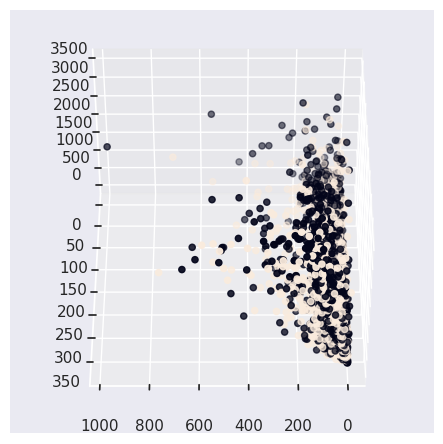

In [ ]:


fig = plt.figure()
ax = plt.axes(projection='3d')
yline=clusters_scaled['TotalAmount']
xline=clusters_scaled['InvoiceNo']
zline=clusters_scaled['Last_transaction']

ax.scatter3D(xline, zline,yline,c=new1_df['two_clusters'])
ax.view_init(45, 90)



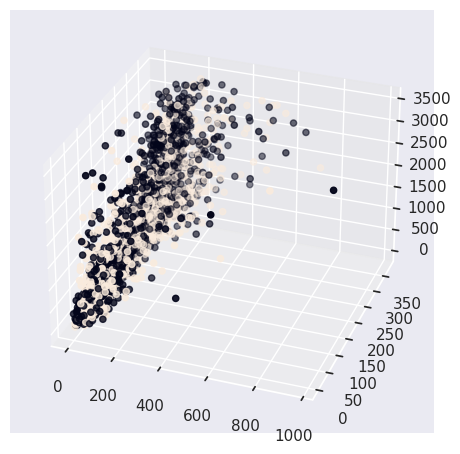

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
yline=clusters_scaled['TotalAmount']
xline=clusters_scaled['InvoiceNo']
zline=clusters_scaled['Last_transaction']

ax.scatter3D(xline, zline,yline,c=new1_df['two_clusters'])
ax.view_init(30, -70)


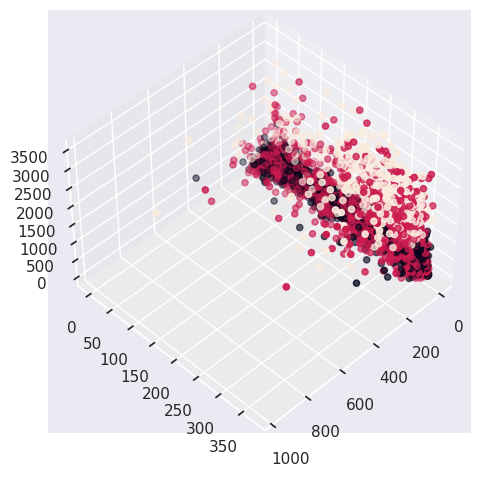

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
yline=clusters_scaled['TotalAmount']
xline=clusters_scaled['InvoiceNo']
zline=clusters_scaled['Last_transaction']

ax.scatter3D(xline, zline,yline,c=new1_df['three_clusters'])
ax.view_init(45, 45)



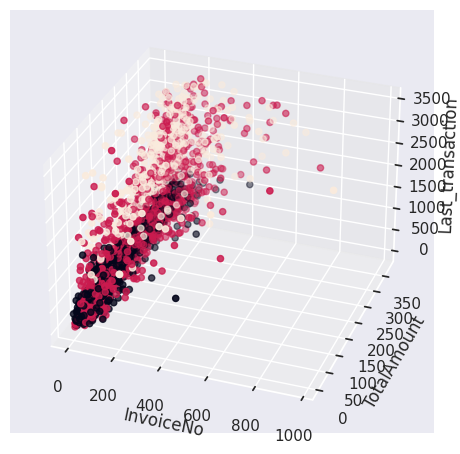

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
yline=clusters_scaled['TotalAmount']
xline=clusters_scaled['InvoiceNo']
zline=clusters_scaled['Last_transaction']
ax.set_xlabel('InvoiceNo')
ax.set_ylabel('TotalAmount')
ax.set_zlabel('Last_transaction')

ax.scatter3D(xline, zline,yline,c=new1_df['three_clusters'])
ax.view_init(30, -70)


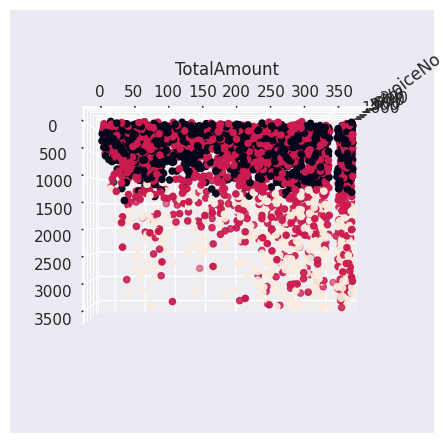

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
yline=clusters_scaled['TotalAmount']
xline=clusters_scaled['InvoiceNo']
zline=clusters_scaled['Last_transaction']
plt.xlabel('InvoiceNo')
plt.ylabel('TotalAmount')

ax.scatter3D(xline, zline,yline,c=new1_df['three_clusters'])
ax.view_init(180, 0)
